# **Stock Price Prediction Project using LSTM and RNN**

## **Project Overview**

Stock price prediction plays a crucial role in financial markets, and accurate forecasts can have significant implications for businesses, investors, and financial institutions. 

Stock price prediction helps investors and fund managers make informed investment decisions. By accurately forecasting future stock prices, investors can identify potential opportunities for maximizing profits or minimizing losses. It enables them to allocate their capital wisely and adjust their investment portfolios based on predicted price movements.

Machine and Deep Learning have demonstrated their potential to enhance stock price prediction accuracy and assist investors, traders, and financial analysts in making informed decisions. By leveraging ML techniques, businesses can gain valuable insights, optimize investment strategies, and improve risk management in stock market's complex and dynamic realm.

The prediction of stock prices is a challenging task due to the inherent complexity and volatility of financial markets. Traditional methods often fail to capture the intricate patterns and dependencies present in stock price data. However, RNN and LSTM models have shown great potential in capturing temporal dependencies and making accurate predictions in various time series forecasting tasks.


In this project, we will focus on implementing recurrent neural networks (RNNs) and long short-term memory (LSTM) networks specifically for the task of stock price prediction. This project serves as an essential foundation for understanding and utilizing these advanced deep learning techniques in the context of financial forecasting.

Throughout this project, we will delve into the fundamentals of RNNs and LSTMs and explore their suitability for capturing temporal dependencies in stock price data. We will learn how to preprocess and prepare the historical stock price dataset for training and testing our models.


![image.png](https://images.pexels.com/photos/6801874/pexels-photo-6801874.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

## **Approach**


* Neural Networks Basics:
    * Review the basics of neural networks to understand their structure and functionality.
    * Building and Training Neural Networks with Keras on an Example Dataset

* Loading Time Series Data:
    * Obtain the time series data for stock prices from yahoo finance.


* Data Transformations:
    * Perform feature scaling or normalization to bring data into a consistent range.
    * Overlapping window creation for training.


* Recurrent Neural Networks:
    * Model Building and Training
    * Sequence Generation and Evaluation

* LSTMs:
    * Model Building and Training
    * Sequence Generation and Evaluation


* Multivariate Input and LSTMs
    * Creating Technical Indicators
    * Creating Labels
    * Perform feature scaling or normalization to bring data into a consistent range.
    * Model Building and Training
    * Evaluation


## **Install Packages**


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Import Libraries**

In [ ]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

2023-08-21 05:02:29.042278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 05:02:29.151785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-21 05:02:29.151818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-21 05:02:29.171361: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-21 05:02:31.202232: W tensorflow/stream_executor/platform/de

In [ ]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

## **Refresher: Neural Networks**

### **Neural Network Architecture**

Neural networks, also known as artificial neural networks or simply neural nets, are computational models inspired by the structure and functionality of the human brain. They are widely used in machine learning and deep learning for solving complex problems across various domains.

#### **Basic Structure**

A neural network consists of interconnected layers of artificial neurons, also known as nodes or units. The layers are organized into an input layer, one or more hidden layers, and an output layer. The input layer receives the input data, the hidden layers process the information, and the output layer produces the final predictions or outputs.

#### **Neurons and Connections**

Each neuron in a neural network performs a computation on its inputs and produces an output. The neurons in one layer are connected to the neurons in the subsequent layer through weighted connections. These weights determine the strength of the connections and are adjusted during the training process to optimize the network's performance.


#### **Mathematics of a Basic Neural Network**

A basic neural network consists of multiple layers of neurons connected by weighted connections. Let's consider a neural network with one input layer, one hidden layer, and one output layer.

#### **Notation**:

- Input layer: $X = [x_1, x_2, ..., x_n]$, where $x_i$ represents the $i$-th input feature.
- Hidden layer: $H = [h_1, h_2, ..., h_m]$, where $h_i$ represents the $i$-th neuron in the hidden layer.
- Output layer: $Y = [y_1, y_2, ..., y_k]$, where $y_i$ represents the $i$-th output neuron.

#### **Forward Propagation**:

The weighted sum of inputs for a neuron in the hidden layer is calculated as:

$$z_j = \sum_{i=1}^{n} w_{ji}^{(1)} x_i + b_j^{(1)}$$

where $w_{ji}^{(1)}$ represents the weight connecting the $i$-th input to the $j$-th neuron in the hidden layer, and $b_j^{(1)}$ is the bias term for the $j$-th neuron.

The output of each neuron in the hidden layer is obtained by applying an activation function $\sigma$:

$$h_j = \sigma(z_j)$$

Similarly, the weighted sum of inputs for a neuron in the output layer is calculated as:

$$z_k = \sum_{j=1}^{m} w_{kj}^{(2)} h_j + b_k^{(2)}$$

where $w_{kj}^{(2)}$ represents the weight connecting the $j$-th neuron in the hidden layer to the $k$-th neuron in the output layer, and $b_k^{(2)}$ is the bias term for the $k$-th neuron.

The output of each neuron in the output layer is obtained by applying an activation function $\sigma$:

$$y_k = \sigma(z_k)$$

#### **Activation Functions:**

Activation functions are a vital component of neural networks. They introduce non-linearity and enable the neural network to learn complex relationships in the data. Here are a few reasons why activation functions are necessary:

1. **Non-Linearity**: Without activation functions, the neural network would only be able to approximate linear functions, limiting its learning capacity. Activation functions allow the network to model non-linear relationships between inputs and outputs.

2. **Normalization**: Activation functions can normalize the output of a neuron, ensuring that the values fall within a desired range. This can help in stabilizing the learning process and improving the convergence of the network.

3. **Differentiability**: Activation functions are differentiable, which is essential for training neural networks using gradient-based optimization algorithms like backpropagation. The gradients of the activation functions help in updating the weights and biases during the training process.



Common activation functions used in neural networks include the sigmoid function, tanh (hyperbolic tangent) function, and Rectified Linear Unit (ReLU) function.

By applying activation functions after the weighted sum of inputs, neural networks can model complex relationships and make non-linear predictions, enabling them to solve a wide range of problems.


#### **Feedforward Propagation**

In feedforward propagation, the information flows through the network in the forward direction, starting from the input layer and passing through the hidden layers until it reaches the output layer. Each neuron receives inputs from the previous layer, computes its weighted sum, applies the activation function, and passes the output to the next layer.

#### **Backpropagation**

Backpropagation is an algorithm used to train neural networks by adjusting the weights based on the calculated gradients of the loss function with respect to the weights. It involves computing the error between the predicted outputs and the actual targets and propagating this error backward through the network to update the weights.

#### **Loss Functions**

Loss functions quantify the difference between the predicted outputs of the neural network and the actual targets. Common loss functions include mean squared error (MSE) for regression tasks and cross-entropy for classification tasks. The choice of the loss function depends on the nature of the problem being solved.

#### **Optimization Algorithms**

Optimization algorithms, such as stochastic gradient descent (SGD) and its variants (e.g., Adam, RMSprop), are used to minimize the loss function and update the weights of the neural network during training. These algorithms adjust the weights iteratively based on the gradients computed through backpropagation.

#### **Hidden Layers and Network Depth**

The hidden layers in a neural network perform the computations necessary for feature extraction and representation learning. The number of hidden layers and the number of neurons in each layer, referred to as the network's depth, are hyperparameters that can be adjusted based on the complexity of the problem and the available computational resources.

#### **Deep Neural Networks**

Deep neural networks refer to neural networks with multiple hidden layers. Deep learning has gained significant attention due to the ability of deep neural networks to learn hierarchical representations and solve complex problems in areas such as computer vision, natural language processing, and speech recognition.

Neural network architecture plays a crucial role in the performance and capabilities of the model. Choosing the right architecture, including the number of layers, the number of neurons, and the activation functions, is essential for achieving optimal results in various machine learning and deep learning tasks.


### **Neural Network Prediction for Regression and Classification**

Neural networks are versatile models that can be used for both regression and classification tasks. The prediction process differs slightly depending on the type of problem being addressed.

#### **Regression Prediction**

In regression tasks, the goal is to predict a continuous numerical value as the output. Here's how neural networks make predictions for regression:

1. **Feedforward Propagation**: The input data is passed through the neural network in the forward direction. Each neuron in the network receives inputs from the previous layer, computes the weighted sum of inputs, applies an activation function, and passes the output to the next layer. This process continues until the output layer is reached.

2. **Output Layer**: In regression, the output layer typically consists of a single neuron that produces a continuous numerical value. The activation function used in the output layer depends on the specific requirements of the problem. For example, a ReLU function is commonly used for regression tasks.

3. **Final Prediction**: The output value of the neural network's output neuron represents the predicted value for the regression task. It can be interpreted as the model's estimation or approximation of the target value based on the given input.

#### **Classification Prediction**

In classification tasks, the goal is to assign input data to specific categories or classes. Neural networks can perform multi-class or binary classification. Here's how neural networks make predictions for classification:

1. **Feedforward Propagation**: Similar to regression, the input data is propagated through the network in the forward direction. Each neuron computes the weighted sum of inputs, applies an activation function, and passes the output to the next layer.

2. **Output Layer**: In classification, the output layer depends on the number of classes in the problem. For binary classification, the output layer typically consists of a single neuron using a sigmoid activation function, which produces a value between 0 and 1 representing the probability of belonging to the positive class. For multi-class classification, the output layer may consist of multiple neurons using softmax activation, where each neuron represents the probability of belonging to a specific class.

3. **Final Prediction**: In binary classification, the predicted class can be determined based on a threshold value (e.g., 0.5). If the output probability is above the threshold, the sample is classified as the positive class; otherwise, it is classified as the negative class. In multi-class classification, the class with the highest predicted probability is assigned as the predicted class.

Neural networks learn the mapping between the input data and the desired output through the training process, where the weights and biases are adjusted to minimize the error between the predicted output and the actual target values. Once trained, the neural network can be used to make predictions on new, unseen data.

Understanding how neural networks make predictions in regression and classification tasks is crucial for interpreting the model's outputs and evaluating its performance.


![alternatvie text](images/mlp.png)

## **Simple Neural Network in Tensorflow**

In [ ]:
abalone_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", 
                    "Viscera weight", "Shell weight", "Age"]

In [ ]:
abalone_train = pd.read_csv("abalone_train.csv", names = abalone_features)
abalone_test = pd.read_csv("abalone_test.csv",  names = abalone_features)

In [ ]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
abalone_train_features = abalone_train.copy()
abalone_train_labels = abalone_train_features.pop('Age')

In [ ]:
abalone_test_features = abalone_test.copy()
abalone_test_labels = abalone_test_features.pop('Age')

In [ ]:
normalize = tf.keras.layers.Normalization()
normalize.adapt(abalone_train_features)

2023-08-21 05:02:36.884753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-21 05:02:36.884839: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-21 05:02:36.884862: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-3147a38a-915e-43f6-9d87-4b15a9ac6f18): /proc/driver/nvidia/version does not exist
2023-08-21 05:02:36.885060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
abalone_model = tf.keras.Sequential([
    normalize, tf.keras.layers.Dense(64), tf.keras.layers.Dense(1)
])

In [ ]:
abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_train_features, abalone_train_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 1ms/step - loss: 93.8476
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 56.5969
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 18.2497
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 6.0734
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1029
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0393
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0131
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0091
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 4.9684
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9465


In [ ]:
predictions = abalone_model.predict(abalone_test_features)

27/27 [==============================] - 0s 658us/step


In [ ]:
squared_error = tf.keras.metrics.MeanSquaredError()
squared_error.update_state(abalone_test_labels, predictions)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [ ]:
print(f'Mean Squared error for test set: {squared_error.result().numpy()}')

Mean Squared error for test set: 5.685250282287598


## **Time Series Data**

### Loading data

In [ ]:
dataset = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466095,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672226,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804698,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784394,394024400


### Plotting training and test data

In [ ]:
tstart = 2016
tend = 2020

In [ ]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price")
    plt.show()

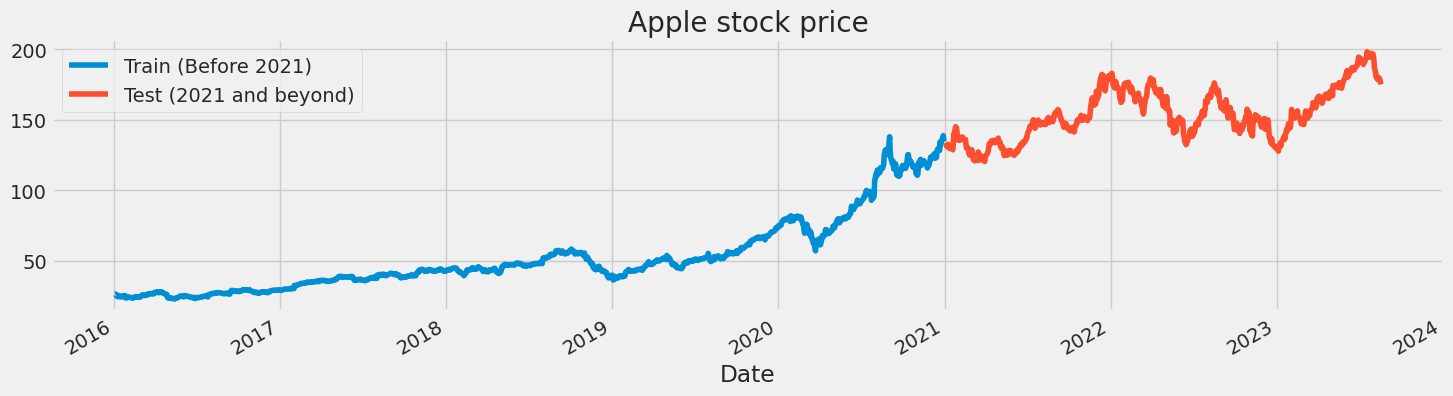

In [ ]:
train_test_plot(dataset, tstart, tend)

### Creating train and test datasets

In [ ]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [ ]:
training_set, test_set = train_test_split(dataset, tstart, tend)

### Scaling dataset values

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

### Creating overlapping window batches

In [ ]:
n_steps = 1
features = 1

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [ ]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

### Evaluation

In [ ]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [ ]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

## **Refresher: Recurrent Neural Networks**

RNN were created because there were a few issues in the feed-forward neural network:

Cannot handle sequential data
Considers only the current input
Cannot memorize previous inputs
The solution to these issues is the RNN. An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory.

RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.

Below is how you can convert a Feed-Forward Neural Network into a Recurrent Neural Network

<img src="images/rnn.png" 
     align="center" 
     width="700" />

The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.

<img src="images/rnn_animation.gif" 
     align="center" 
     width="450" />

The four commonly used types of Recurrent Neural Networks are:

**One-to-One**: The simplest type of RNN is One-to-One, which allows a single input and a single output. It has fixed input and output sizes and acts as a traditional neural network. The One-to-One application can be found in Image Classification.

**One-to-Many**: One-to-Many is a type of RNN that gives multiple outputs when given a single input. It takes a fixed input size and gives a sequence of data outputs. Its applications can be found in Music Generation and Image Captioning.

**Many-to-One**: Many-to-One is used when a single output is required from multiple input units or a sequence of them. It takes a sequence of inputs to display a fixed output. Sentiment Analysis is a common example of this type of Recurrent Neural Network.

**Many-to-Many**: Many-to-Many is used to generate a sequence of output data from a sequence of input units.

This type of RNN is further divided into ﻿the following two subcategories:

    1. Equal Unit Size: In this case, the number of both the input and output units is the same. A common application can be found in Name-Entity Recognition.
    2. Unequal Unit Size: In this case, inputs and outputs have different numbers of units. Its application can be found in Machine Translation.

<img src="images/types_rnn.png" 
     align="center" 
     width="750" />

### Vanilla RNN

In [ ]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))

In [ ]:
# Compiling the model
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [ ]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

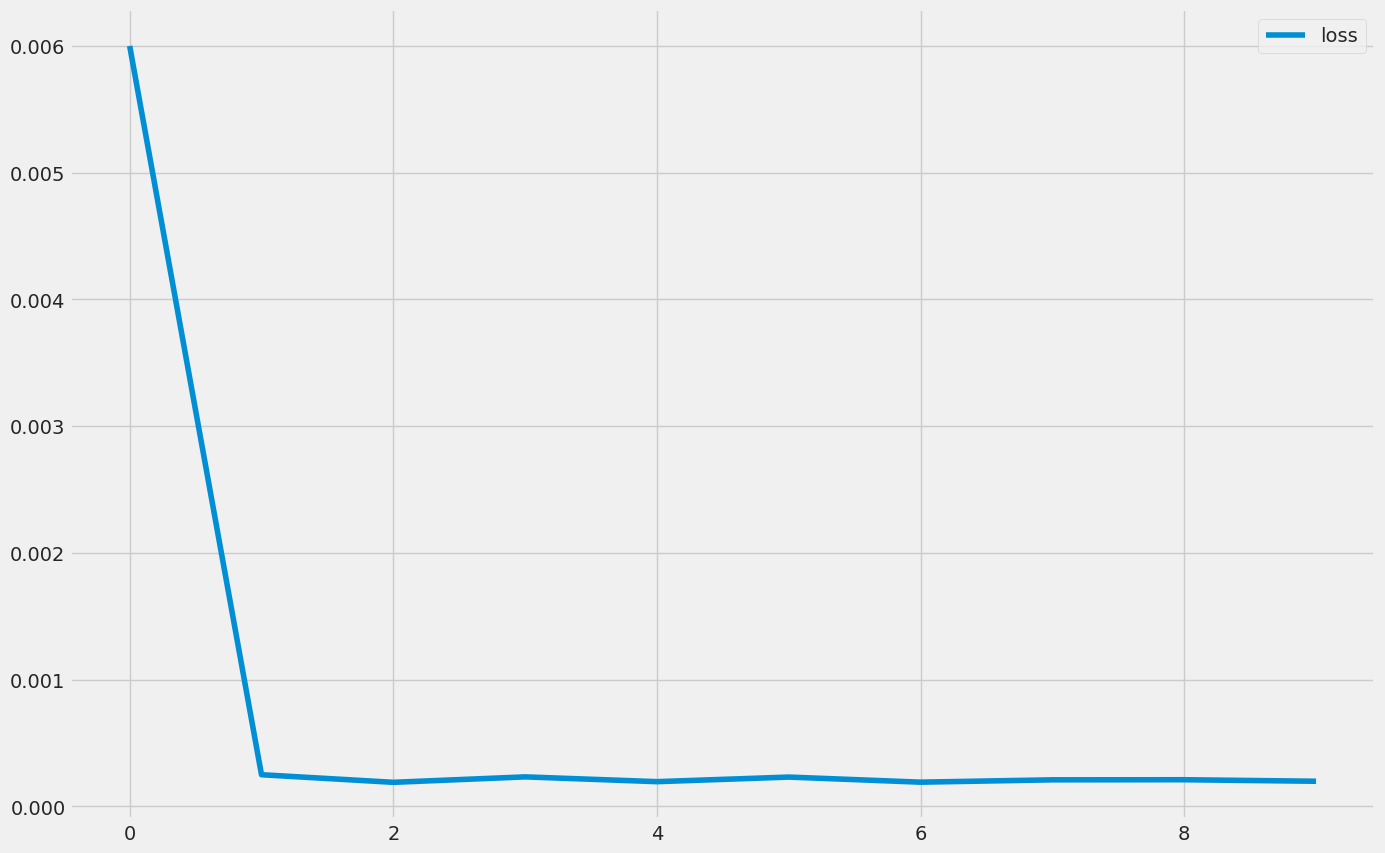

In [ ]:
plot_loss(history)

## **Time Series Prediction**

One way of looking at time series prediction is given a full test set, we extract the past window and predict a point in the future. This is may not work in practice if we want to predict a bigger window ahead. For instance, in the stock prediction problem we want to see price of a specific share over a period of several days and/or weeks

For this scenario we would need to do sequence generation, which makes use of previous predicted values on our sliding window. This can lead to significant noise accumulation as predictions are not perfect

In [ ]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [ ]:
# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(-1, n_steps, features)

In [ ]:
# Prediction
predicted_stock_price = model_rnn.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

21/21 [==============================] - 0s 740us/step


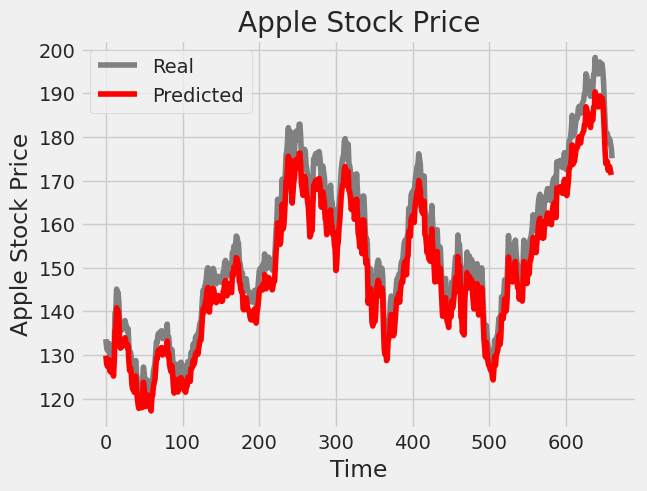

In [ ]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

### Sequence Generation

In [ ]:
steps_in_future = 25

In [ ]:
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model:Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))
    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)
        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [ ]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

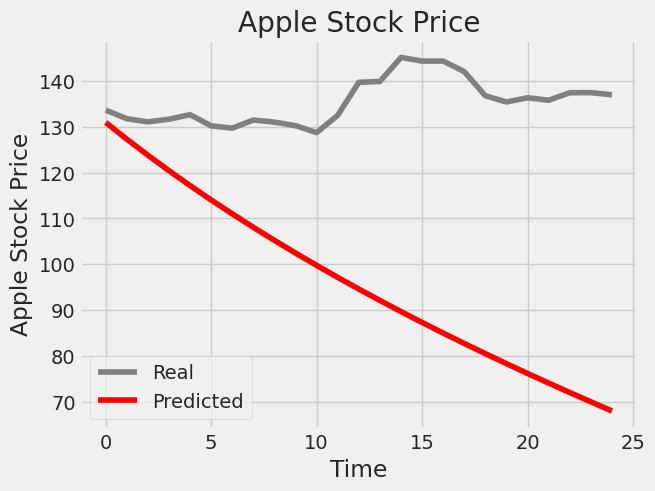

In [ ]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

## **Refresher: LSTM**

Now, even though RNNs are quite powerful, they suffer from Vanishing gradient problem which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: Long Short Term Networks(LSTM).

**What is Vanishing Gradient problem?**

Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

<img src="images/decay.png" 
     align="center" 
     width="750" />

**Fixing the Vanishing/Exploding Gradient with LSTMs**

Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

<img src="images/lstm.png" 
     align="center" 
     width="750" />

More on LSTMs: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

In [ ]:
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [ ]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

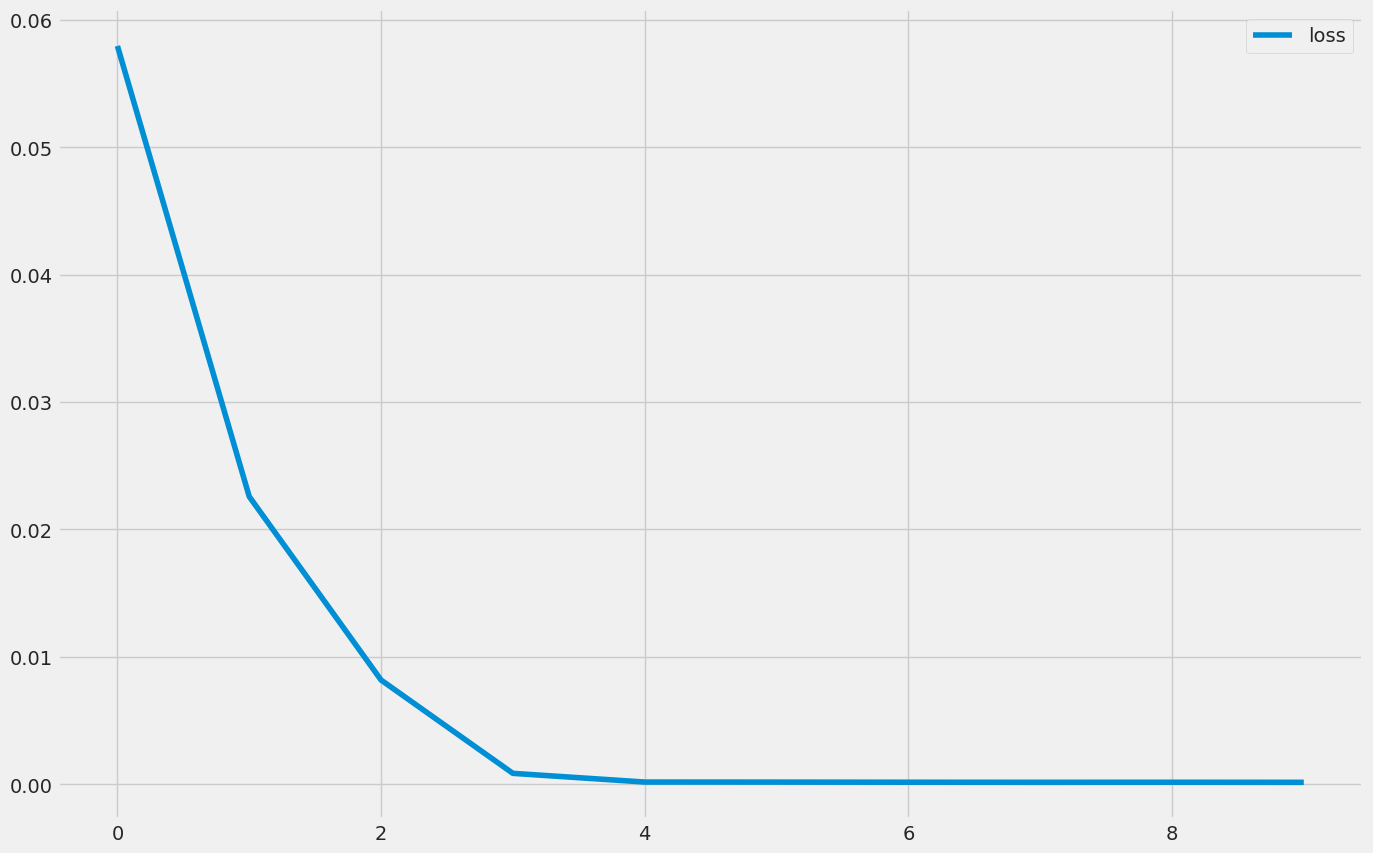

In [ ]:
plot_loss(history)

In [ ]:
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

21/21 [==============================] - 0s 2ms/step


### Time Series Prediction: LSTM

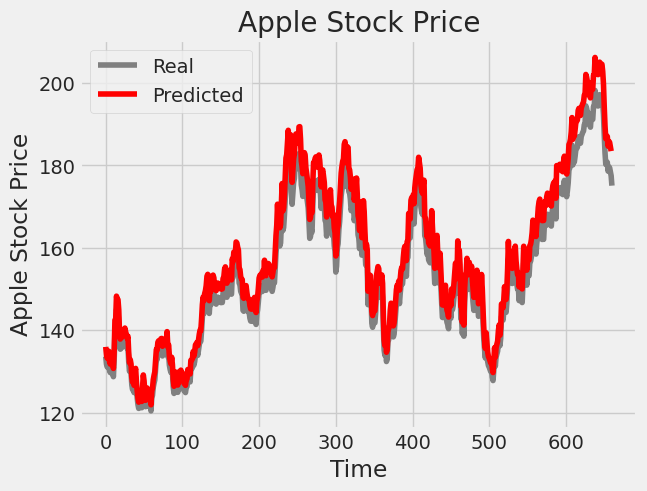

In [ ]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

### Sequence Generation: LSTM

In [ ]:
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)

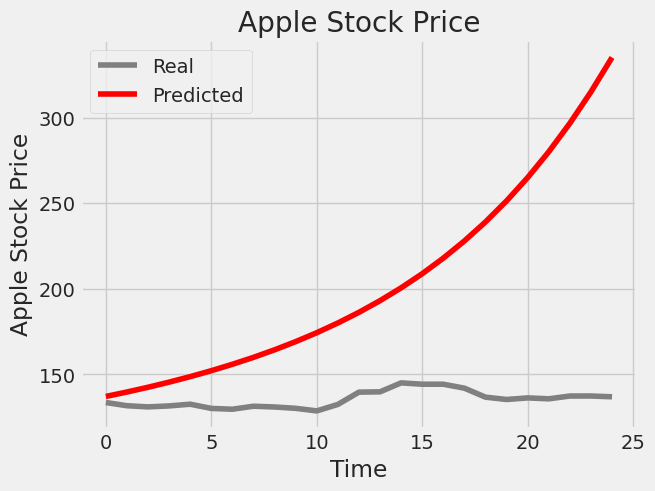

In [ ]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

## Multivariate Input

RNN's can be used with several dimensions, like images. Each dimension will be a different time series. In here we calculate technical indicators that correlate with our stock price to predict **Gains**

In [ ]:
mv_features = 6

In [ ]:
multi_variate_df = dataset.copy()

### Creating Technical Indicators

**Relative Strength Index (RSI)**: The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.

**Exponential Moving Average (EMA)**: An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average simple moving average (SMA), which applies an equal weight to all observations in the period. Traders often use several different EMA lengths, such as 10-day, 50-day, and 200-day moving averages.

In [ ]:
import pandas_ta as ta

In [ ]:
multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)

### Creating Labels

Labels are created by calculating the difference in closing price of share.

In [ ]:
multi_variate_df['Target'] = multi_variate_df['Adj Close'] - dataset.Open
multi_variate_df['Target'] = multi_variate_df['Target'].shift(-1)
multi_variate_df.dropna(inplace=True)
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)

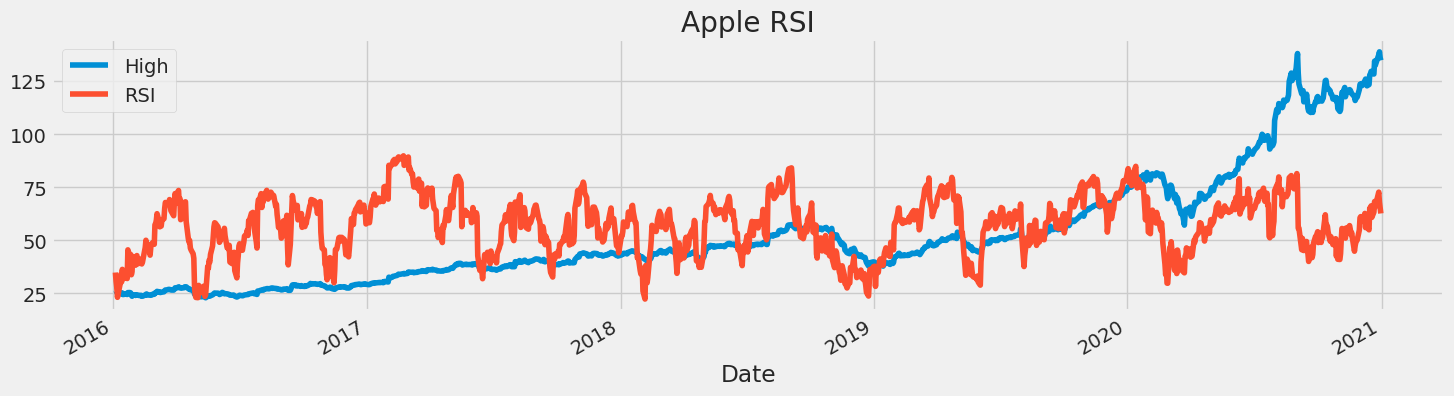

In [ ]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'RSI']].plot(figsize=(16, 4), legend=True)
plt.title("Apple RSI")
plt.show()

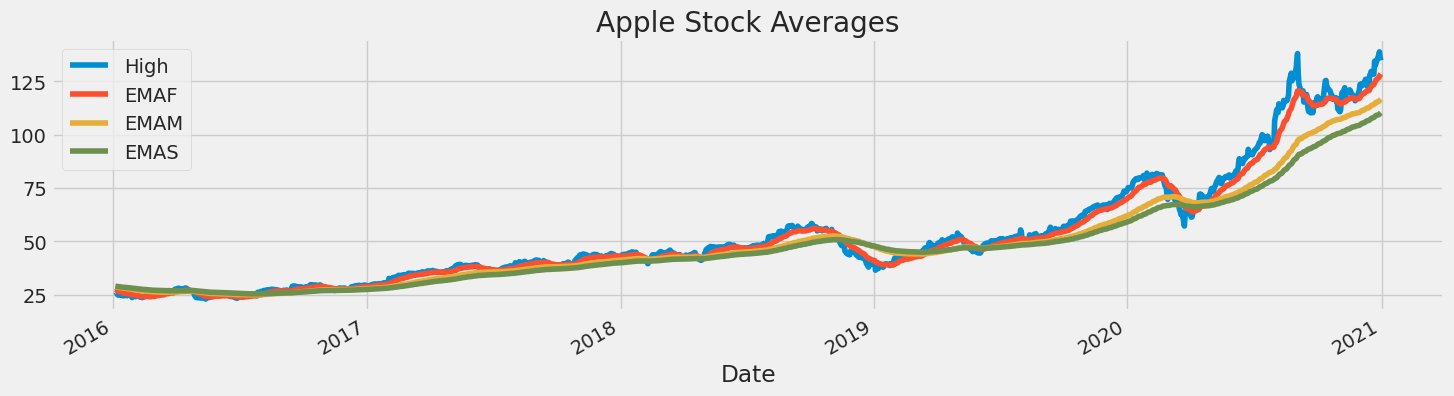

In [ ]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)
plt.title("Apple Stock Averages")
plt.show()

In [ ]:
feat_columns = ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']
label_col = ['Target']

### Splitting train and test data

In [ ]:
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + label_col)

In [ ]:
X_train = mv_training_set[:, :-1]
y_train = mv_training_set[:, -1]

X_test = mv_test_set[:, :-1]
y_test = mv_test_set[:, -1]

### Scaling Data

In [ ]:
mv_sc = MinMaxScaler(feature_range=(0, 1))
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)

### Model

In [ ]:
model_mv = Sequential()
model_mv.add(LSTM(units=125, input_shape=(1, mv_features)))
model_mv.add(Dense(units=1))
# Compiling the model
model_mv.compile(optimizer="RMSprop", loss="mse")

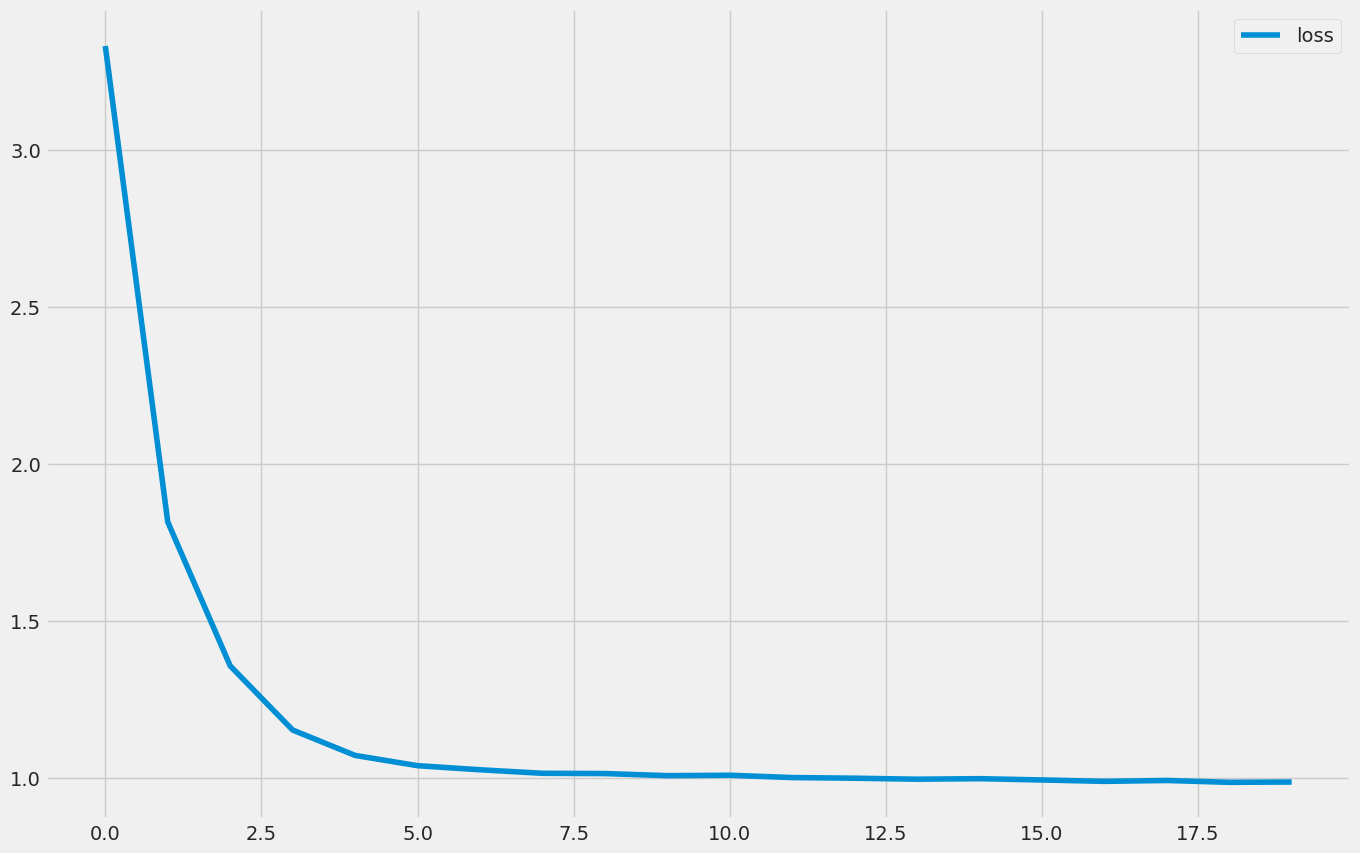

In [ ]:
history = model_mv.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
plot_loss(history)

### Results

21/21 [==============================] - 0s 895us/step


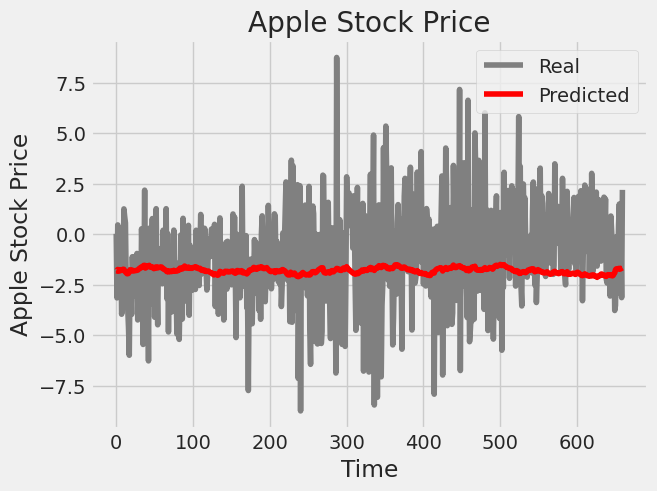

In [ ]:
predictions = model_mv.predict(X_test)
plot_predictions(y_test, predictions, "Apple Stock Price")

## **Conclusion**

In this project, we explored the use of Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) models for stock price prediction. We followed a step-by-step approach to understand the concepts, preprocess the data, build the models, and evaluate their performance.

Throughout the project, we gained insights into the complexities and challenges involved in predicting stock prices. We learned how to preprocess time series data, build neural network models, and evaluate their performance. This project serves as a starting point for further exploration and experimentation in the field of stock price prediction using RNNs and LSTMs.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3147a38a-915e-43f6-9d87-4b15a9ac6f18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>